# Sentinel-2 Compositing Tool
Created by Adriana Caswell, Christian Devey, and Muhammad Ba

This tool creates median value composites for Sentinel-2 bands, resamples them to 10 m, and provides statistics about the composite.

## Instructions
1. Download Sentinel-2 imagery for your area of interest from the [Copernicus Browser](https://browser.dataspace.copernicus.eu/?zoom=5&lat=50.16282&lng=20.78613&themeId=DEFAULT-THEME&visualizationUrl=U2FsdGVkX1%2FJM9kH%2BZTOodn54nQTsQojRItObJfZovzmGSowX5hLBm%2BFj2vfLZW%2FN2uZri%2FbvtjYDsX6u2J9wEGs7i4wLVFnhsQEAJQ5vCeK530XHWUgopyvijgM9lOU&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30&dateMode=SINGLE).
2. In the *User input* section, define `inputS2` as directory where zipped Sentinel-2 SAFE files are saved.
3. Within `inputS2` directory, set up the following subdirectories: `clippedS2`, `composites`, `composites10m`. This is where intermediate and final output files will be saved.
4. In the *User input* section, define `aoiShp` as the path to the area of interest shapefile.
5. In the *User input* section, define `lineSpacing` as ...
6. Run the code blocks below.

In [14]:
# import python modules
import os
import s2composite as s2
import rasterio as rio
from rasterio.plot import show

# the below set up can be removed once we merge all our functions into s2composite
# os.chdir('functions')
# from gridStats import gridStats

## User inputs

In [15]:
# path to folder containing raw Sentinel-2 files
inputS2 = "demo/S2"

# paths to intermediate files
clippedS2 = os.path.join(inputS2, 'clippedS2') # S2 files clipped to AOI and converted to TIFFs
compS2 = os.path.join(inputS2, 'composites') # median value composites
resampledS2 = os.path.join(inputS2, 'composites10m') # resampled median value composites

# path to area of interest shapefile
aoiShp = "demo/StudyArea/StudyArea.shp"

# line spacing for grid statistics (in meters)
lineSpacing = 1000

## Create composites

In [16]:
# read in S2 files, clip to AOI, and convert to TIFF
s2.prepS2(inputS2, aoiShp, clippedS2)

# sort bands
bands, meta10m, meta20m, meta60m = s2.sortBands(clippedS2)

# create median value composite
s2.compositeBands(bands, meta10m, meta20m, meta60m, compS2)

Clipping and converting 30 Sentinel-2 images...
Clipping and conversion complete.
Sorting images by band...
Sort complete.
B01 composite created.
B02 composite created.
B03 composite created.
B04 composite created.
B05 composite created.
B08 composite created.
B11 composite created.
B12 composite created.


In [ ]:
# calculate band stats
bandStats = gridStats(bands,lineSpacing)

In [ ]:
# resample median value composites

## Display composites

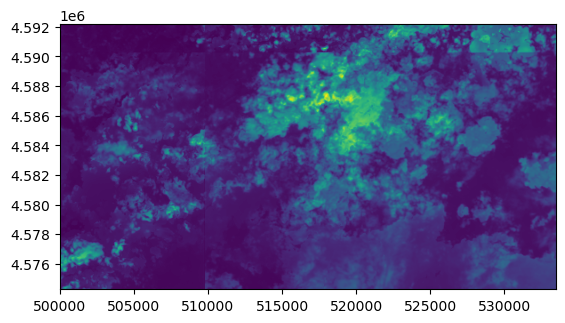

<Axes: >

In [20]:
B01 = "demo/S2/composites/B01_composite.tif"

src = rio.open(B01)
show(src)